## 支持向量机(SVM - support vector machine)

- 支持向量机是较为强大的分类方法

- 有三个重点: 间隔, 对偶, 核技巧

- 可以分为三类:
    - 硬间隔
    - 软间隔
    - 核方法

### 硬间隔

- 最初是为了解决二分类问题, 使用 $w^Tx + b$超平面将两类数据分隔, 返回结果为判别模型, 而非概率模型:

$$ f(w) = sign(w^Tx + b)$$ 

- 对间隔最大化进行数据表达: 

$$\begin{cases}
目标: &\max margin(w,b) \\
条件: &s.t.\; y_i(w^Tx+b) >0
\end{cases}$$

- 因为求的是距离超平面最近点的最远距离, 所以公式可以表达为:

$$\begin{cases}
&\max\limits_{w,b}\min\limits_{i} \frac1{\lVert w\rVert}|w^Tx_i +b| = \max\limits_{w,b}\frac1{\lVert w\rVert}\min\limits_{i} y_i(w^Tx_i +b)\\
&s.t.\; y_i(w^Tx+b) >0
\end{cases}$$

- 引入最小间隔 $\gamma$, 令 $ \min\limits_{i} y_i(w^Tx_i +b) = \gamma$, 所以对所有数据点会有 $y_i(w^Tx_i +b) \geq \gamma$, 引入后的公式为:

$$\begin{cases}
&\max\limits_{w,b}\frac\gamma{\lVert w\rVert}\\
&s.t.\; y_i(w^Tx+b) \geq \gamma
\end{cases}$$

- 因为是个优化问题, 并不关心距离 $\gamma$具体数据, 可以将其视作基量等于1, 可得:

$$\begin{cases}
&\max\limits_{w,b}\frac1{\lVert w\rVert} = \min\limits_{w,b}\frac12w^Tw\\
&s.t.\; 1 - y_i(w^Tx+b) \leq 0, for\forall i = \{i,...,N\}
\end{cases}$$

- 代入拉格朗日函数: $$ L(w,b,\gamma) = \frac12w^Tw + \sum_{i=1}^N\lambda_i(1 - y_i(w^Tx_i + b))$$

- 无约束模型(为什么能这样直接跳过, 详细看视频吧): 

$$\begin{cases}
&\min\limits_{w,b}\max\limits_{\lambda}L(w,b,\gamma)\\
&s.t.\; \lambda \geq 0
\end{cases}$$


- 因为对偶关系:  $\min\max L \geq \max\min L $, 所以有:

$$\begin{cases}
&\max\limits_{\lambda}\min\limits_{w,b}L(w,b,\gamma)\\
&s.t.\; \lambda \geq 0
\end{cases}$$


- 先求解最小化:

$$ \frac{\delta L}{\delta b} = \frac{\delta}{\delta b}(-\sum_{i=1}^N\lambda_iy_ib) = \sum_{i=1}^N\lambda_iy_i = 0$$

- 将其代入L中求导可得: $$ w = \sum_{i=1}^N\lambda_iy_ix_i$$

- 再将w代入L中求导可得优化方程: 

$$\begin{cases}
&\max\limits_{\lambda}-\frac12\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jx_i^Tx_j + \sum_{i=1}^N\lambda_i\\
&s.t.\; \lambda \geq 0, \sum_{i=1}^N\lambda_iy_i = 0
\end{cases}$$

- 强对偶关系, 必定满足KKT条件, 引入KKT可得: 

$$\begin{cases}
\frac{\delta L}{\delta w} = 0, \frac{\delta L}{\delta b} = 0,\frac{\delta L}{\delta\lambda} = 0 \\
\lambda_i(1 - yi(w^Tx_i + b)) = 0 \\ 
\lambda \geq 0 \\
1 - yi(w^Tx_i + b) \leq 0
\end{cases}$$


<img src="./svm_margin.jpg" alt="边界方程" style="zoom: 100%;" />

- 根据上图: 距离超平面最近的数据点正好在支持向量上: $w^Tx + b = -1 $ 和 $ w^Tx + b = -1 $ 上, (这里是以 $\gamma$ 为基量的)

- 因为有条件 $ \lambda_i(1 - yi(w^Tx_i + b)) = 0$, 对支持向量上, $ \lambda_i$可以取非零值, 但不在支持向量上的点而言, $ \lambda_i$必然为零, 所以$ \lambda_i$ 作用就是筛选出最近数据点

- 因此, $\exist(x_k,y_k), s.t.\; 1- y_k(w^Tx_k + b) = 0$

- 所以结合 $y^2_k = 1$ 和 $y^2_k(w^Tx_k + b) = y_k$ 有 $$ b^* = y_k - wTx$$

- 代入 $ w^* = \sum_{i=1}^N\lambda_iy_ix_i$, 有 $$ b^*_k = y_k -  \sum_{i=1}^N\lambda_iy_ix_i^Tx_k$$

- 分类决策函数为: $$ f(x) = sign(w^{*T}x + b^*)$$

- 因为只有在支持向量上才有 $\lambda_i$, 可以看出 $ w^*, b^*$的值只和支持向量有关.

## 软间隔

- 增加Loss来允许一点点错误

$$\begin{cases}
& \min\limits_{w,b}\frac12w^Tw + C\sum^N_{i=1}\xi_i\\
&s.t.\; y_i(w^Tx+b) \geq 1 - \xi_i, for\forall i = \{i,...,N\} \\
&s.t.\; \xi_i \geq 0
\end{cases}$$

### 代码

#### smo

In [1]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random


"""
随机选择lambda
Parameters: i - lambda_i的索引值, m - lambda参数个数
Returns: j - lambda_j的索引值
"""
def selectJrand(i, m):
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j

"""
修剪lambda
Parameters:    aj - lambda_j值    H - lambda上限    L - lambda下限
Returns:    aj - alpah值
"""
def cliplambda(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

"""
简化版SMO算法
Parameters:    dataMatIn - 数据矩阵    classLabels - 数据标签    C - 松弛变量0.6    toler - 容错率 0.001    maxIter - 最大迭代次数 40
"""
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn); 
    labelMat = np.mat(classLabels).transpose()
    #初始化b参数，统计dataMatrix的维度
    b = 0; 
    m,n = np.shape(dataMatrix)
    #初始化lambda参数，设为0
    lambdas = np.mat(np.zeros((m,1)))
    #初始化迭代次数
    iter_num = 0
    #最多迭代matIter次
    while (iter_num < maxIter):
        lambdaPairsChanged = 0
        for i in range(m):
            #步骤1：计算误差Ei
            fXi = np.multiply(lambdas,labelMat).T*(dataMatrix*dataMatrix[i,:].T) + b
            Ei = fXi - labelMat[i]
            #优化lambda，设定一定的容错率。
            if ((labelMat[i]*Ei < -toler) and (lambdas[i] < C)) or ((labelMat[i]*Ei > toler) and (lambdas[i] > 0)):
                #随机选择另一个与lambda_i成对优化的lambda_j
                j = selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj = np.multiply(lambdas,labelMat).T*(dataMatrix*dataMatrix[j,:].T) + b
                Ej = fXj - labelMat[j]
                #保存更新前的lambda值，使用深拷贝
                lambdaIold = lambdas[i].copy(); 
                lambdaJold = lambdas[j].copy();
                #步骤2：计算上下界L和H, 如果不是相同分类, 则下界取差值或者0, 上界差值至少大于0.6, 但要更小的
                if (labelMat[i] != labelMat[j]):
                    L = max(0, lambdas[j] - lambdas[i])
                    H = min(C, C + lambdas[j] - lambdas[i])
                #如果是相同分类, 取和
                else:
                    L = max(0, lambdas[j] + lambdas[i] - C)
                    H = min(C, lambdas[j] + lambdas[i])

                if L==H:
                    continue
                #步骤3：计算eta 2xi*yi - xi*xi - yi*yi
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0:
                    continue
                #步骤4：更新lambda_j
                lambdas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪lambda_j
                lambdas[j] = cliplambda(lambdas[j],H,L)
                #lambda_j变化太小 
                if (abs(lambdas[j] - lambdaJold) < 0.00001): 
                    continue
                #步骤6：更新lambda_i
                lambdas[i] += labelMat[j]*labelMat[i]*(lambdaJold - lambdas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(lambdas[i]-lambdaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(lambdas[j]-lambdaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(lambdas[i]-lambdaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(lambdas[j]-lambdaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < lambdas[i]) and (C > lambdas[i]): 
                    b = b1
                elif (0 < lambdas[j]) and (C > lambdas[j]): 
                    b = b2
                else: b = (b1 + b2)/2.0
        #更新迭代次数
        if (lambdaPairsChanged == 0): 
            iter_num += 1
        else: iter_num = 0
        #print("迭代次数: %d" % iter_num)
    return b,lambdas

# 画图
def showClassifer(dataMat, labelMat, w:np.ndarray, b):
    #绘制样本点
    sns.set()
    sns.scatterplot(x=dataMat[:,0], y=dataMat[:,1], hue=labelMat)
    #绘制直线
    x1 = np.max(dataMat[:,0])
    x2 = np.min(dataMat[:,0])
    a1, a2 = w
    a1 = a1[0]
    a2 = a2[0]
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, lamda in enumerate(lambdas):
        if abs(lamda) > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()

#准备数据
dataUrl = '.\\testSet.csv'
df = pd.read_csv(dataUrl)
X = np.array(df)
data = X[:,:2]
label = X[:,2]


b,lambdas = smoSimple(data, label, 2, 0.001, 40)

lambdas= np.array(lambdas)
w = np.dot((np.tile(label.reshape(1, -1).T, (1, 2)) * data).T, lambdas)


showClassifer(data, label, w, b[0,0])

ModuleNotFoundError: No module named 'seaborn'

#### scikit 实现

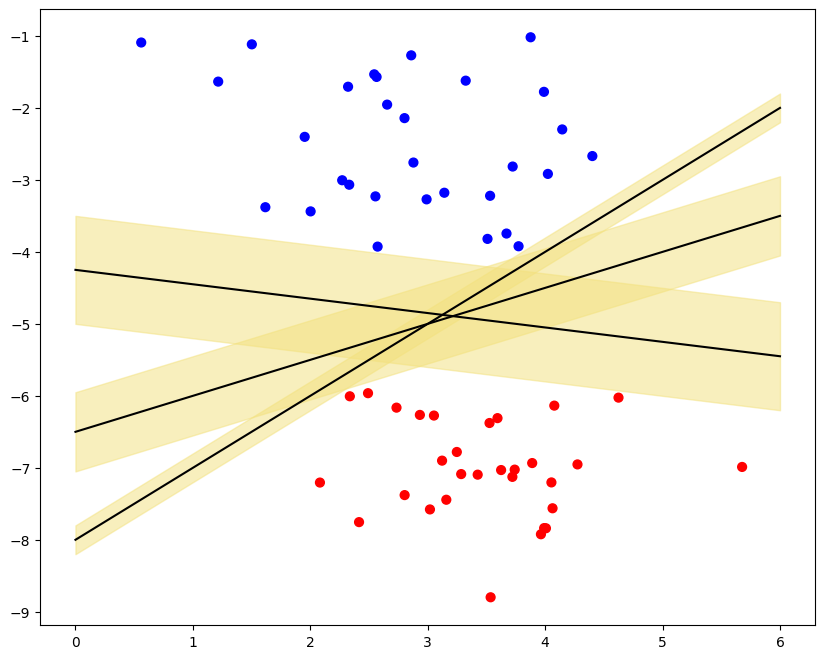

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x, y = make_blobs(n_samples=60, centers=2, random_state=30, cluster_std=0.8)  # 生成示例数据

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

# 绘制 3 条不同的分割线
x_temp = np.linspace(0, 6)
for m, b, d in [(1, -8, 0.2), (0.5, -6.5, 0.55), (-0.2, -4.25, 0.75)]:
    y_temp = m * x_temp + b
    plt.plot(x_temp, y_temp, "-k")
    plt.fill_between(x_temp, y_temp - d, y_temp + d, color="#f3e17d", alpha=0.5)

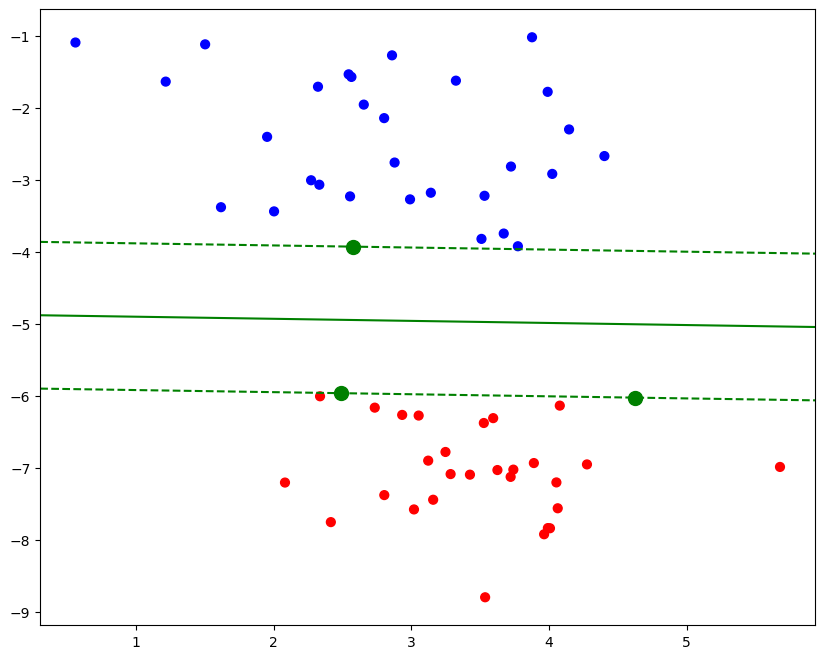

In [6]:
from sklearn.svm import SVC

linear_svc = SVC(kernel="linear")
linear_svc.fit(x, y)
linear_svc.support_vectors_


def svc_plot(model):
    # 获取到当前 Axes 子图数据，并为绘制分割线做准备
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 使用轮廓线方法绘制分割线
    ax.contour(X, Y, P, colors="green", levels=[-1, 0, 1], linestyles=["--", "-", "--"])

    # 标记出支持向量的位置
    ax.scatter(
        model.support_vectors_[:, 0], model.support_vectors_[:, 1], c="green", s=100
    )


# 绘制最大间隔支持向量图
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)

##### 软间隔

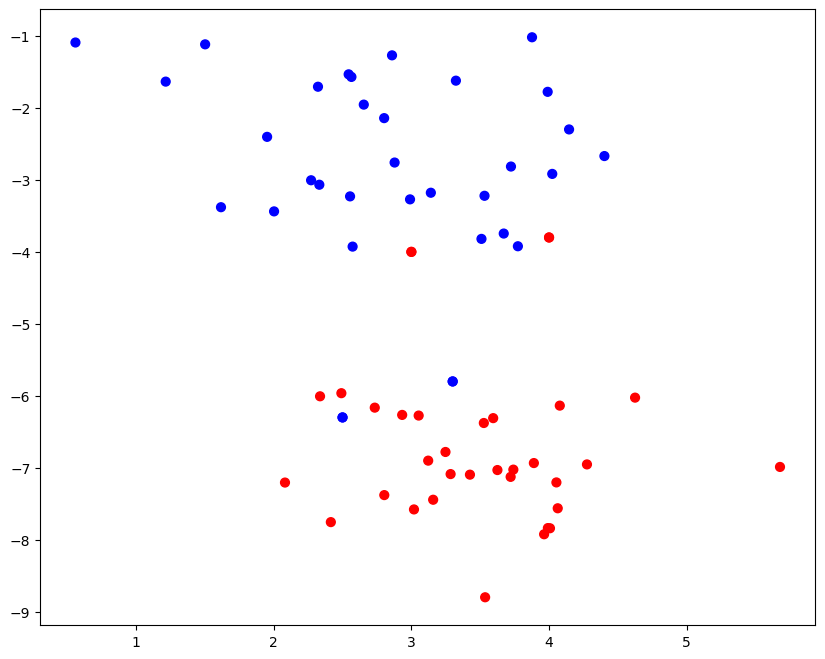

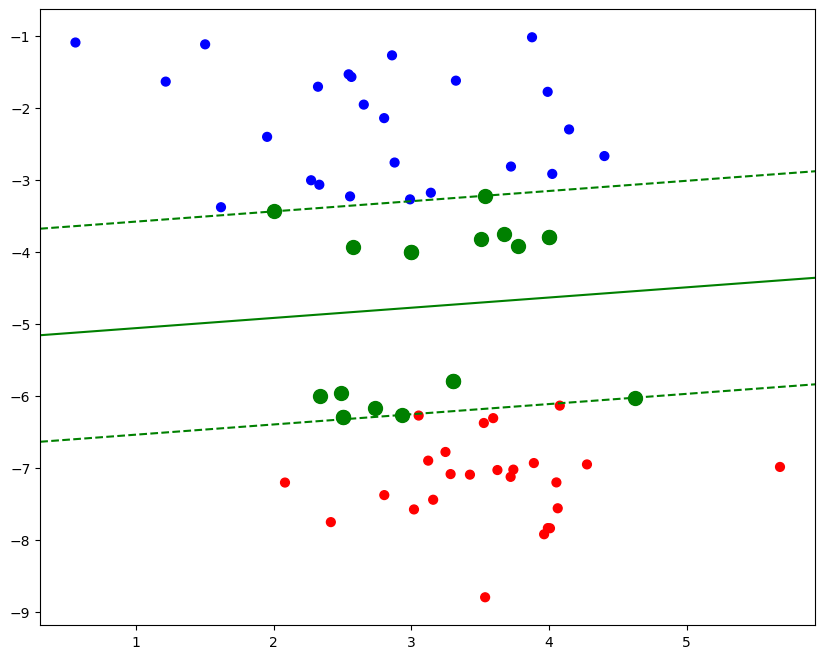

In [8]:
# 向原数据集中加入噪声点
x = np.concatenate((x, np.array([[3, -4], [4, -3.8], [2.5, -6.3], [3.3, -5.8]])))
y = np.concatenate((y, np.array([1, 1, 0, 0])))

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

linear_svc.fit(x, y)  # 训练

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)